Top 20 Findings in BIMCV-R Dataset:
                           Finding  Count
3             ground glass pattern   2776
1                        pneumonia   2466
22                        covid 19   2152
15                          nodule   1966
5                 pleural effusion   1605
14                       unchanged   1492
7                       adenopathy   1357
20  vertebral degenerative changes   1214
40             calcified densities   1172
0                    consolidation   1012
11                       emphysema    919
36             laminar atelectasis    884
2                     cardiomegaly    866
47                          normal    857
30                  bronchiectasis    843
21    pulmonary artery enlargement    713
24                  pulmonary mass    697
31                   hiatal hernia    694
61                     infiltrates    687
9             interstitial pattern    675


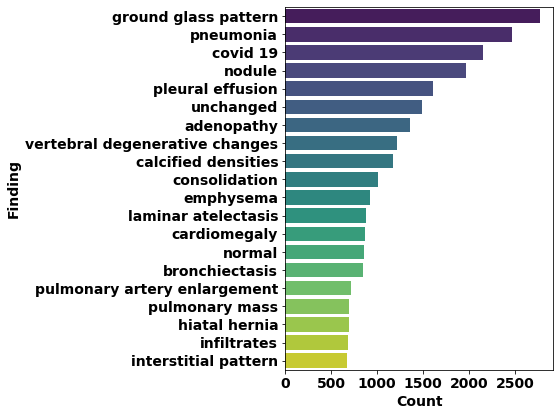


Reports mentioning 'atelectasis': 1255 found
      PatientID                                            ct_path  \
4   sub-S326512  /raid/cl522/BIMCV_CT/BIMCV-COVID19-cIter_1_2_3...   
6   sub-S326512  /raid/cl522/BIMCV_CT/BIMCV-COVID19-cIter_1_2_3...   
14  sub-S329586  /raid/cl522/BIMCV_CT/BIMCV-COVID19-cIter_1_2_3...   
17  sub-S319381  /raid/cl522/BIMCV_CT/BIMCV-COVID19-cIter_1_2_3...   
32   sub-S10975  /raid/cl522/BIMCV_CT/BIMCV-COVID19-cIter_1_2_3...   

                                            Report_en  
4   Pulmonary TC study.Findings The study presents...  
6   TCARACICO EXPLORATION.Findings is compared to ...  
14  Toracic TC is performed with IV contrast with ...  
17  .Angiotc is performed with IV contrast in pulm...  
32  Urgent pulmonary TC angio with IV contrast.Fin...  


In [6]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib style settings
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size': 14})

# === Step 1: Load the BIMCV-R metadata ===
file_path = "/NAS/shared_data/for_VNLST/ft42/ct_public/BIMCVR/BIMCVR_Dataset/BIMCV_meta.csv"  # Update with your local path if needed
df = pd.read_csv(file_path)

# === Step 2: Parse the stringified list in 'Labels' column ===
df['Labels'] = df['Labels'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# === Step 3: Count the frequency of each label ===
all_labels = [label.strip().lower() for labels in df['Labels'] for label in labels if label.strip()]
label_counts = Counter(all_labels)
label_df = pd.DataFrame(label_counts.items(), columns=['Finding', 'Count']).sort_values(by='Count', ascending=False)

# === Step 4: Display the top findings ===
print("Top 20 Findings in BIMCV-R Dataset:")
print(label_df.head(20))

# Optional: Plot the top 20 findings
plt.figure(figsize=(8, 6))
sns.barplot(data=label_df.head(20), y='Finding', x='Count', palette="viridis")
#plt.title("Top 20 Most Frequent Findings in BIMCV-R")
plt.tight_layout()
plt.show()

# === Step 5 (Optional): Search reports for a keyword ===
def search_reports(keyword, report_column='Report_en'):
    keyword = keyword.lower()
    matches = df[df[report_column].str.lower().str.contains(keyword, na=False)]
    print(f"\nReports mentioning '{keyword}': {len(matches)} found")
    return matches[['PatientID', 'ct_path', report_column]]

# Example: Search for "atelectasis"
keyword_results = search_reports("atelectasis")
print(keyword_results.head())



Patient and CT Counts:
        Split  Patients  CT Scans
0       Train      4272      6441
1  Validation       534       812
2        Test       534       816

Final Radiology-Style Table:
                           Finding  Total         Train   Validation  \
0                       # Patients   5340  4272 (80.0%)  534 (10.0%)   
1                       # CT Scans   8069  6441 (79.8%)  812 (10.1%)   
2             ground glass pattern   2776  2182 (78.6%)  300 (10.8%)   
3                        pneumonia   2466  1975 (80.1%)   234 (9.5%)   
4                         covid 19   2152  1719 (79.9%)   212 (9.9%)   
5                           nodule   1966  1574 (80.1%)  207 (10.5%)   
6                 pleural effusion   1605  1262 (78.6%)  171 (10.7%)   
7                        unchanged   1492  1157 (77.5%)  162 (10.9%)   
8                       adenopathy   1357  1040 (76.6%)  141 (10.4%)   
9   vertebral degenerative changes   1214   965 (79.5%)  132 (10.9%)   
10             cal

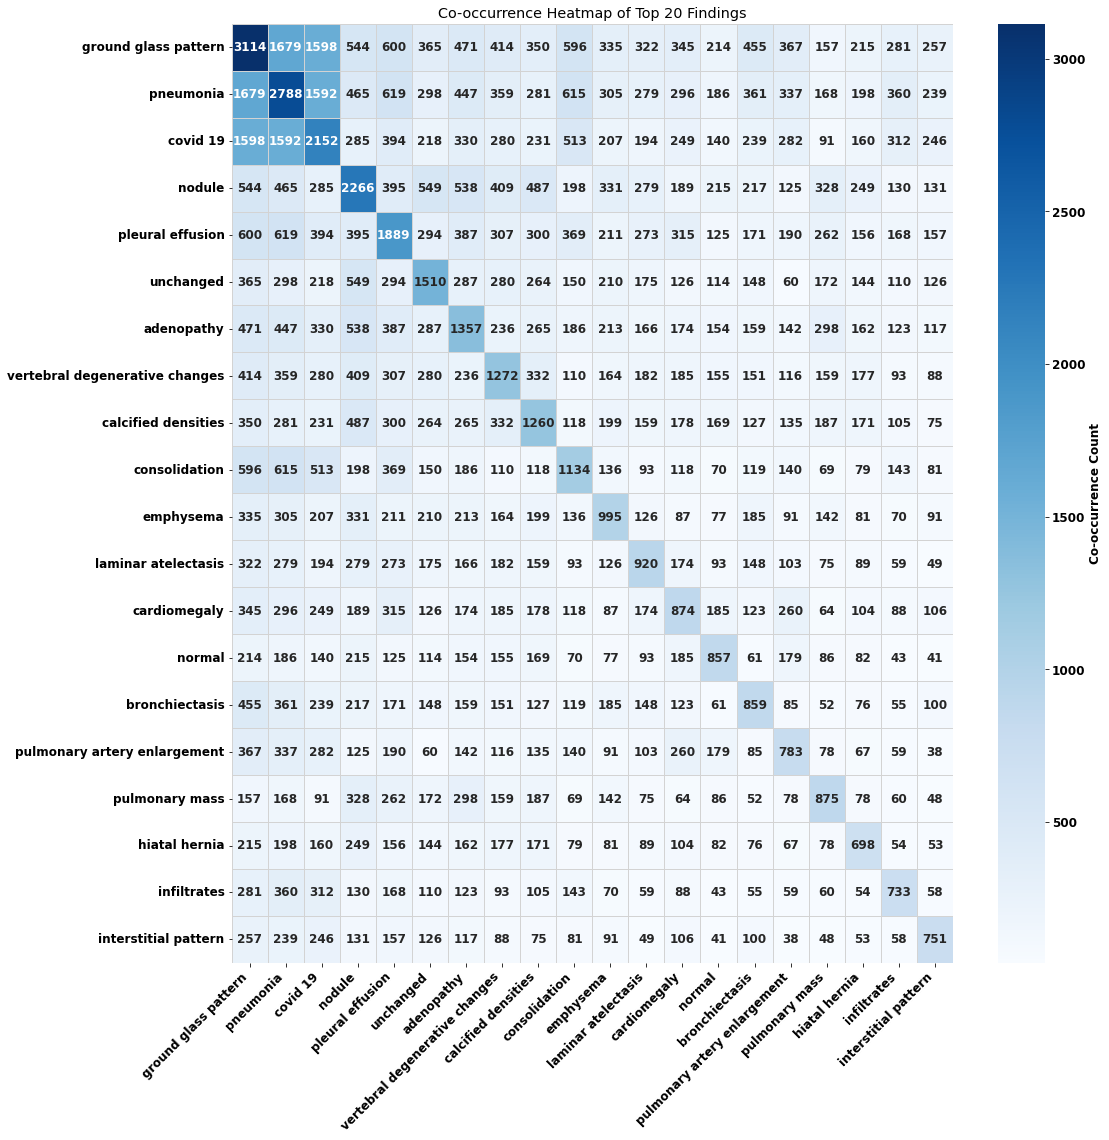

In [2]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
# Matplotlib style settings
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size': 12})

# === Step 1: Load and parse BIMCV metadata ===
df = pd.read_csv("/NAS/shared_data/for_VNLST/ft42/ct_public/BIMCVR/BIMCVR_Dataset/BIMCV_meta.csv")
df['Labels'] = df['Labels'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# === Step 2: Patient-level split (80% train, 10% val, 10% test) ===
unique_patients = df['PatientID'].unique()
train_patients, temp_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)
val_patients, test_patients = train_test_split(temp_patients, test_size=0.5, random_state=42)

train_df = df[df['PatientID'].isin(train_patients)].copy()
val_df = df[df['PatientID'].isin(val_patients)].copy()
test_df = df[df['PatientID'].isin(test_patients)].copy()

# === Step 3: Patient and CT count per split ===
split_summary = pd.DataFrame({
    "Split": ["Train", "Validation", "Test"],
    "Patients": [train_df['PatientID'].nunique(), val_df['PatientID'].nunique(), test_df['PatientID'].nunique()],
    "CT Scans": [len(train_df), len(val_df), len(test_df)]
})
print("\nPatient and CT Counts:")
print(split_summary)

# === Step 4: Count top 10 findings across splits ===
def count_labels(df):
    labels = [label.strip().lower() for lst in df['Labels'] for label in lst if label.strip()]
    return Counter(labels)

top_labels = [label for label, _ in Counter(
    [l.strip().lower() for labels in df['Labels'] for l in labels if l.strip()]
).most_common(10)]

train_counts = count_labels(train_df)
val_counts = count_labels(val_df)
test_counts = count_labels(test_df)


# === Step 4: Create summary table ===
summary_df = pd.DataFrame({
    "Finding": top_labels,
    "Train": [train_counts.get(label, 0) for label in top_labels],
    "Validation": [val_counts.get(label, 0) for label in top_labels],
    "Test": [test_counts.get(label, 0) for label in top_labels],
})
summary_df["Total"] = summary_df["Train"] + summary_df["Validation"] + summary_df["Test"]

# Add total CTs and Patients
split_totals = pd.DataFrame({
    "Finding": ["# Patients", "# CT Scans"],
    "Train": [train_df['PatientID'].nunique(), len(train_df)],
    "Validation": [val_df['PatientID'].nunique(), len(val_df)],
    "Test": [test_df['PatientID'].nunique(), len(test_df)],
})
split_totals["Total"] = split_totals["Train"] + split_totals["Validation"] + split_totals["Test"]

# Combine both tables
combined_df = pd.concat([split_totals, summary_df], ignore_index=True)

# === Step 5: Format for radiology-style table (Count + %) ===
def format_count_pct(count, total):
    pct = (count / total) * 100 if total else 0
    return f"{int(count)} ({pct:.1f}%)"

final_table = pd.DataFrame()
final_table["Finding"] = combined_df["Finding"]
final_table["Total"] = combined_df["Total"]
final_table["Train"] = combined_df.apply(lambda row: format_count_pct(row["Train"], row["Total"]), axis=1)
final_table["Validation"] = combined_df.apply(lambda row: format_count_pct(row["Validation"], row["Total"]), axis=1)
final_table["Test"] = combined_df.apply(lambda row: format_count_pct(row["Test"], row["Total"]), axis=1)

# === Step 6: Display final summary ===
print("\nFinal Radiology-Style Table:")
print(final_table)

# Optional: Save to CSV
final_table.to_csv("bimcv_split_summary_table.csv", index=False)



# === Step 5: Co-occurrence heatmap for top 20 findings ===
# Get top 20 labels
all_labels = sorted({l.strip().lower() for lst in df['Labels'] for l in lst if l.strip()})
label_counts_all = count_labels(df)
top20 = [l for l, _ in label_counts_all.most_common(20)]

# Build co-occurrence matrix
label_idx = {label: i for i, label in enumerate(top20)}
co_matrix = np.zeros((20, 20), dtype=int)

for labels in df['Labels']:
    clean = [l.strip().lower() for l in labels if l.strip() and l.strip().lower() in top20]
    for i in range(len(clean)):
        for j in range(i, len(clean)):
            idx_i, idx_j = label_idx[clean[i]], label_idx[clean[j]]
            co_matrix[idx_i][idx_j] += 1
            if i != j:
                co_matrix[idx_j][idx_i] += 1

co_df = pd.DataFrame(co_matrix, index=top20, columns=top20)

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(
    co_df,
    cmap="Blues",
    annot=True,
    fmt="d",
    square=False,
    linewidths=0.5,
    linecolor='lightgray',
    cbar_kws={'label': 'Co-occurrence Count'}
)
plt.title("Co-occurrence Heatmap of Top 20 Findings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("co_occurrence_heatmap_top20.png",bbox_inches="tight",dpi=300)
plt.show()

# === Optional: Save outputs ===
split_summary.to_csv("bimcv_split_summary.csv", index=False)
final_table.to_csv("bimcv_finding_distribution.csv", index=False)
train_df.to_csv("bimcv_train.csv", index=False)
val_df.to_csv("bimcv_val.csv", index=False)
test_df.to_csv("bimcv_test.csv", index=False)
